In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("FINAL_FROM_DF.csv")

In [3]:
df.head()

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN
0,20MICRONS,EQ,37.80,37.80,36.15,36.85,37.40,37.05,27130,994657.90,2017-06-28,202,INE144J01027
1,3IINFOTECH,EQ,4.10,4.85,4.00,4.55,4.65,4.05,20157058,92148517.65,2017-06-28,7353,INE748C01020
2,3MINDIA,EQ,13425.15,13469.55,12920.00,13266.70,13300.00,13460.55,2290,30304923.35,2017-06-28,748,INE470A01017
3,63MOONS,EQ,61.00,61.90,60.35,61.00,61.10,60.65,27701,1689421.00,2017-06-28,437,INE111B01023
4,8KMILES,EQ,546.10,548.00,535.00,537.45,535.20,547.45,79722,43208620.05,2017-06-28,1866,INE650K01021


Separamos las columnas numéricas y las categóricas

In [4]:
numerical_columns = []
categorical_columns = []
for column in df.columns:
    if df[column].dtype == 'object':
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)

Se aplica un preprocesamiento a los datos, estandarizando las columnas numéricas y aplicando one-hot encoding a las categóricas.

In [5]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_columns),
    ("cat", OneHotEncoder(), categorical_columns)
])

In [6]:
X = preprocessor.fit_transform(df)

Ejecutamos el algoritmo K-means para diferentes valores de k (número de clusters) y calculamos la inercia (SSE) para cada k.

In [7]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    diff = inertias[-2] - inertias[-1] if k > 1 else 0
    print(f'K={k}, Inercia = {kmeans.inertia_:,.6f} - Diferencia = {diff:,.6f}')

K=1, Inercia = 10,352,930.937264 - Diferencia = 0.000000
K=2, Inercia = 7,741,917.072283 - Diferencia = 2,611,013.864981
K=3, Inercia = 6,551,656.794131 - Diferencia = 1,190,260.278151
K=4, Inercia = 5,596,418.842768 - Diferencia = 955,237.951363
K=5, Inercia = 5,053,612.209628 - Diferencia = 542,806.633140
K=6, Inercia = 4,791,239.614321 - Diferencia = 262,372.595307
K=7, Inercia = 4,653,844.614514 - Diferencia = 137,394.999808
K=8, Inercia = 4,191,203.310894 - Diferencia = 462,641.303620
K=9, Inercia = 4,026,170.901677 - Diferencia = 165,032.409217
K=10, Inercia = 3,929,184.158668 - Diferencia = 96,986.743009


Graficamos la inercia en función del número de clusters para identificar el "codo" que indica el número óptimo de clusters.

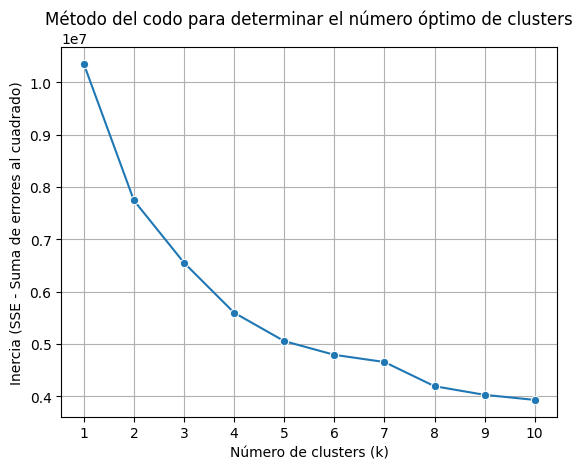

In [8]:
sns.lineplot(x=range(1, 11), y=inertias, marker="o")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia (SSE - Suma de errores al cuadrado)")
plt.title("Método del codo para determinar el número óptimo de clusters")
plt.xticks(range(1, 11))
plt.grid()
plt.show()

Elegimos el número óptimo de clusters basándonos en la gráfica del método del codo y ajustamos el modelo K-means con ese valor de k.

In [9]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
df["Cluster"] = kmeans.labels_
df.head()

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN,Cluster
0,20MICRONS,EQ,37.80,37.80,36.15,36.85,37.40,37.05,27130,994657.90,2017-06-28,202,INE144J01027,0
1,3IINFOTECH,EQ,4.10,4.85,4.00,4.55,4.65,4.05,20157058,92148517.65,2017-06-28,7353,INE748C01020,0
2,3MINDIA,EQ,13425.15,13469.55,12920.00,13266.70,13300.00,13460.55,2290,30304923.35,2017-06-28,748,INE470A01017,4
3,63MOONS,EQ,61.00,61.90,60.35,61.00,61.10,60.65,27701,1689421.00,2017-06-28,437,INE111B01023,0
4,8KMILES,EQ,546.10,548.00,535.00,537.45,535.20,547.45,79722,43208620.05,2017-06-28,1866,INE650K01021,0


Visualización de los clusters usando PCA para reducir la dimensionalidad a 2D.

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

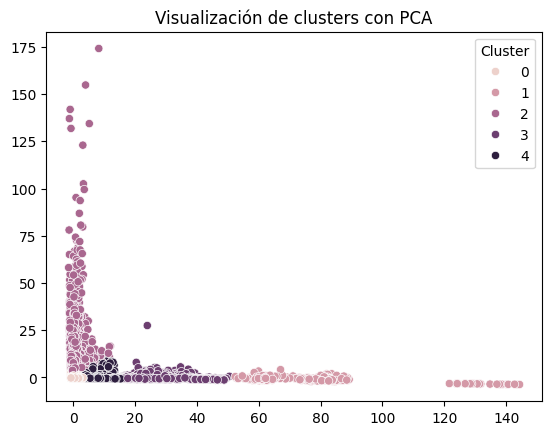

In [11]:
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df["Cluster"])
plt.title("Visualización de clusters con PCA")
plt.show()

Analizamos los resultados del clustering.

In [12]:
df["Cluster"].value_counts()

Cluster
0    804589
2     21271
4     17993
3      2204
1       347
Name: count, dtype: int64

In [13]:
df[numerical_columns + ["Cluster"]].groupby("Cluster").mean()

,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TOTALTRADES
Cluster,,,,,,,,,
0,352.697456,357.834442,347.550570,352.220621,351.649882,352.013335,4.298455e+05,6.577171e+07,3249.854452
1,64100.415850,64792.889481,63386.137176,64062.057061,64043.414265,63770.590778,1.353980e+04,8.038489e+08,6907.334294
2,611.362368,622.898729,601.639301,612.805591,612.170351,610.691883,1.150284e+07,2.638357e+09,73016.241173
3,21016.239111,21297.392831,20711.908802,20992.236388,20980.861025,20935.745622,2.094446e+04,4.556518e+08,6585.207804
4,6097.275197,6155.201837,6042.017600,6099.702850,6098.057966,6096.264631,2.972977e+04,1.465870e+08,3272.593509


In [14]:
df[categorical_columns + ["Cluster"]].groupby("Cluster").agg(lambda x: x.mode()[0])

,SYMBOL,SERIES,TIMESTAMP,ISIN
Cluster,,,,
0,SRTRANSFIN,EQ,2017-12-26,INE979R01011
1,MRF,EQ,2017-12-08,INE883A01011
2,SBIN,EQ,2017-11-30,INE062A01020
3,BOSCHLTD,EQ,2016-06-09,INE323A01026
4,IDFCBANK,EQ,2017-12-26,INE058A01010


<Axes: xlabel='Cluster', ylabel='TOTALTRADES'>

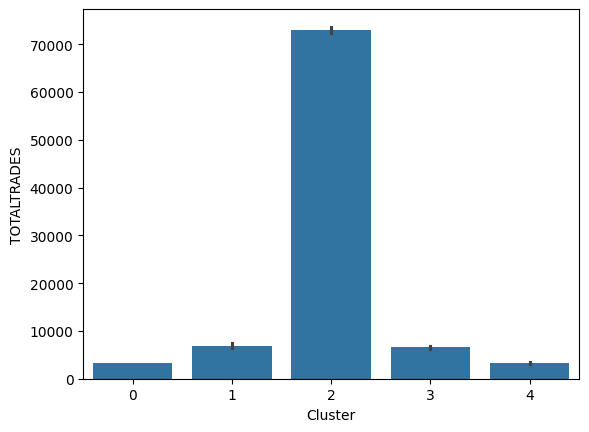

In [15]:
sns.barplot(df, x="Cluster", y="TOTALTRADES", estimator="mean")

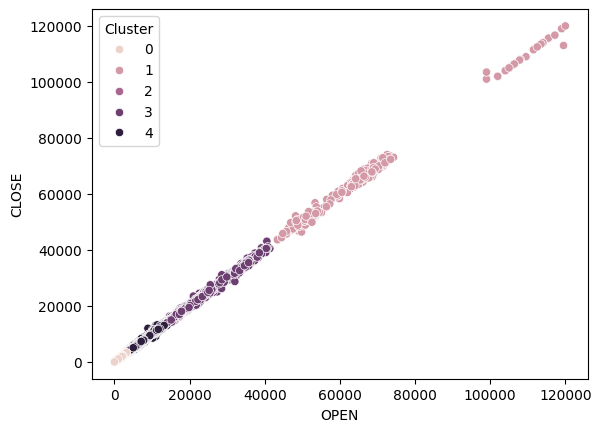

In [16]:
sns.scatterplot(df, x="OPEN", y="CLOSE", hue="Cluster")